In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from ema_workbench.analysis import prim
from ema_workbench.util import ema_logging, utilities

ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [8]:
results = utilities.load_results('Outcomes/1000ScenariosBaseCase.csv')

experiments, outcomes = results
outcomes = pd.DataFrame(outcomes)
experiments = pd.DataFrame(experiments)
results = experiments.join(outcomes)
results = results.drop(columns="model")
# results = results.apply(pd.to_numeric)
results.head()

[MainProcess/INFO] results loaded succesfully from C:\Users\newbi\project-local\Model-based-decision-making\epa1361_open\final assignment\Outcomes\1000ScenariosBaseCase.csv


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_Dike Investment Costs 2,A.3_Expected Number of Deaths 2,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2
0,64.0,341.707998,10.0,0.008967,329.059434,1.0,0.671443,46.836038,1.0,0.541864,...,0,0.000000,0.0,0,0.0,0.0,0,0.0,0.0,0.0
1,49.0,270.516534,1.0,0.389864,64.116779,1.0,0.458602,211.600292,1.5,0.030226,...,0,1.053592,0.0,0,0.0,0.0,0,0.0,0.0,0.0
2,109.0,217.092157,1.0,0.720433,119.844801,1.5,0.445405,332.843340,10.0,0.123183,...,0,1.091069,0.0,0,0.0,0.0,0,0.0,0.0,0.0
3,106.0,314.195207,1.0,0.000931,149.934556,10.0,0.203409,177.126583,1.5,0.900999,...,0,0.000000,0.0,0,0.0,0.0,0,0.0,0.0,0.0
4,123.0,331.097660,1.5,0.138750,275.055604,1.0,0.296295,172.209395,1.5,0.888339,...,0,0.000000,0.0,0,0.0,0.0,0,0.0,0.0,0.0


In [20]:
# Aggregate the outcomes (no location and no time step)

def aggregate_outcomes(results, outcome):
    list_outcomes_columns = []
    
    for i in results.columns:
        if outcome in i:
            list_outcomes_columns.append(i)
            
    results["Total " + str(outcome)] = results[list_outcomes_columns].sum(axis = 1)
            
#     print(list_outcomes_columns)

In [23]:
aggregate_outcomes(results, "Expected Number of Deaths")
aggregate_outcomes(results, "Expected Annual Damage")

In [24]:
results.columns

Index(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail',
       ...
       'A.4_Expected Number of Deaths 2', 'A.5_Expected Annual Damage 2',
       'A.5_Dike Investment Costs 2', 'A.5_Expected Number of Deaths 2',
       'RfR Total Costs 2', 'Expected Evacuation Costs 2',
       'Total Expected Number of Deaths', 'Total Expected Annual Damage',
       'Total Dike Investment Costs', 'Total RfR Total Costs'],
      dtype='object', length=107)

In [132]:
def boxplot_histogram_maker(results):
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    outcomes_list = ["Total Expected Number of Deaths", "Total Expected Annual Damage"]
    
    for i, (ax, outcome) in enumerate(zip(axes.flatten(), outcomes_list)):
        ax.boxplot(results[outcome])
        print(str(outcome) + " First quantile: " + str(results[outcome].quantile(q = 0.25)))
        print(str(outcome) + " Mean: " + str(results[outcome].mean()))

Total Expected Number of Deaths First quantile: 1.229327036452088
Total Expected Number of Deaths Mean: 3.23150710663596
Total Expected Annual Damage First quantile: 583888960.7998052
Total Expected Annual Damage Mean: 1678899372.4850564


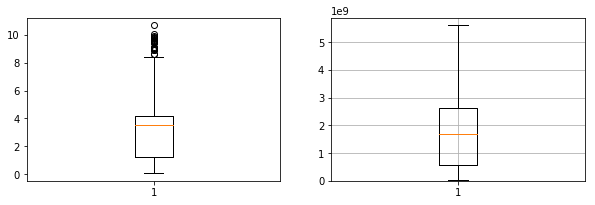

In [133]:
boxplot_histogram_maker(results)

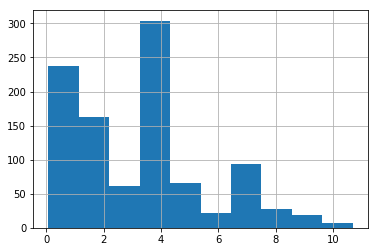

In [136]:
results["Total Expected Number of Deaths"].hist()

In [71]:
x = results.iloc[:, :19]
y_deaths = results["Total Expected Number of Deaths"].values

In [69]:
y_deaths = y_deaths < 1

In [70]:
prim_alg = prim.Prim(x, y_deaths, threshold=0.65, peel_alpha=0.1)
box1 = prim_alg.find_box()

[MainProcess/INFO] 1000 points remaining, containing 209 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.131, coverage: 0.6267942583732058, density: 1.0 restricted_dimensions: 4


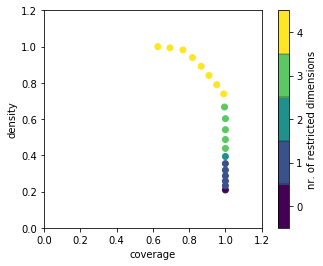

In [57]:
# Coverage is the points of interests in the red box 
# Density is fraction of cases in the box
# 

box1.show_tradeoff()
plt.show()

coverage    0.626794
density            1
id                19
mass           0.131
mean               1
res_dim            4
Name: 19, dtype: object

             box 19                                          
                min       max                       qp values
A.3_pfail  0.464105  0.999879  [1.9486298346508073e-37, -1.0]
A.1_pfail  0.494135  0.999122  [1.0903343161155638e-36, -1.0]
A.5_pfail  0.349070  0.999596    [9.22847861535647e-14, -1.0]
A.2_pfail  0.178197  0.999189    [4.97760946496621e-11, -1.0]



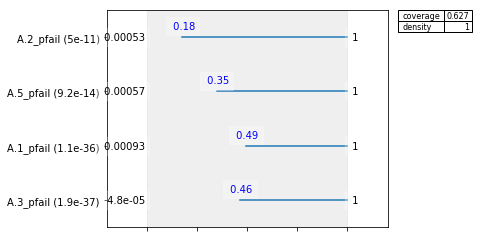

In [58]:
box1.inspect()
box1.inspect(style='graph')
plt.show()

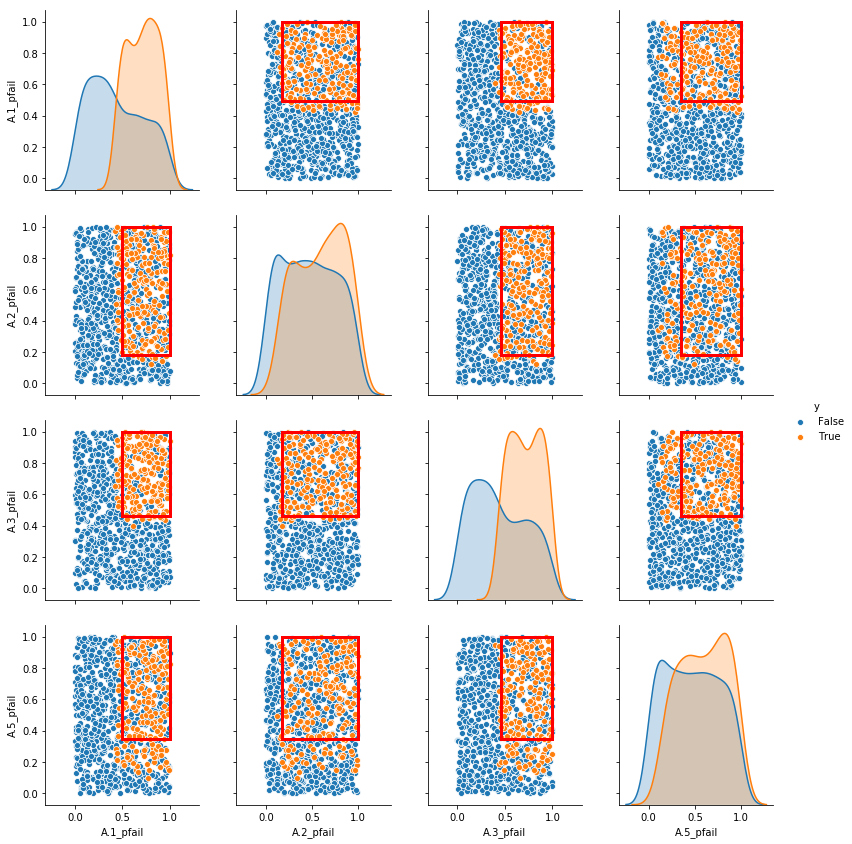

In [60]:
box1.select(19)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [138]:
box2 = prim_alg.find_box()

[MainProcess/INFO] 869 points remaining, containing 78 cases of interest
[MainProcess/INFO] mean: 0.8620689655172413, mass: 0.058, coverage: 0.23923444976076555, density: 0.8620689655172413 restricted_dimensions: 6


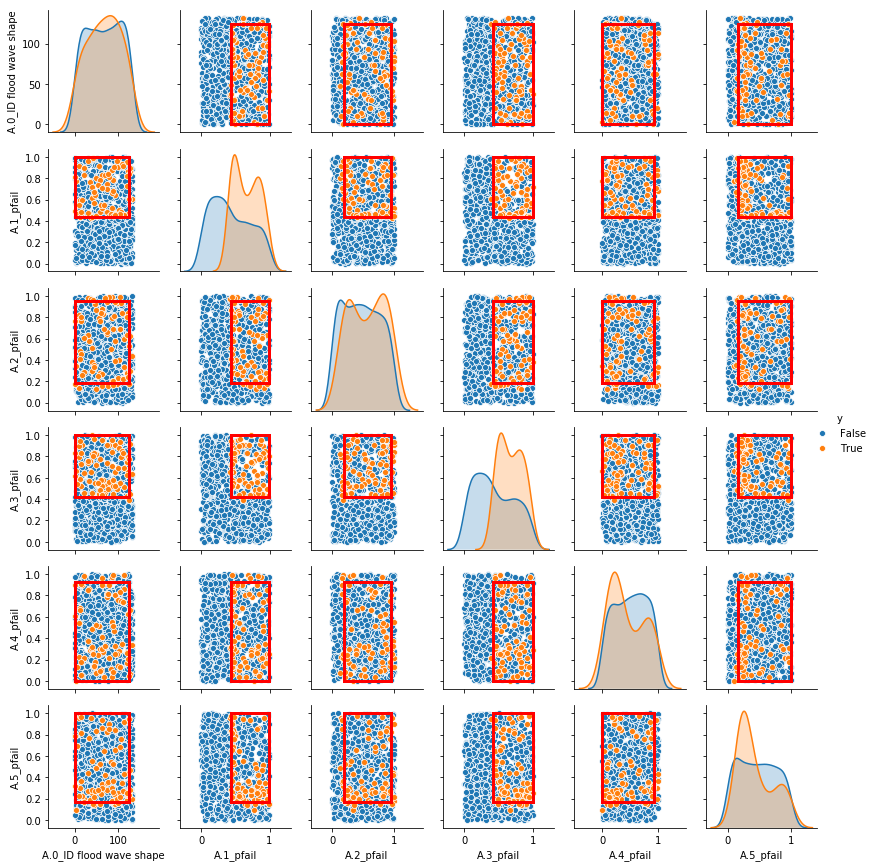

In [144]:
box2.select(-1)
box2.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [140]:
print(prim_alg.stats_to_dataframe())
print(prim_alg.boxes_to_dataframe())

       coverage   density   mass  res_dim
box 1  0.626794  1.000000  0.131        4
box 2  0.239234  0.862069  0.058        6
                               box 1                  box 2          
                                 min       max          min       max
A.1_pfail                   0.494135  0.999122      0.43668  0.999122
A.3_pfail                   0.464105  0.999879     0.424048  0.999879
A.5_pfail                    0.34907  0.999596     0.166135  0.999596
A.2_pfail                   0.178197  0.999189     0.188871  0.950721
A.0_ID flood wave shape            0       132            0     124.5
A.4_pfail                0.000431006  0.999116  0.000431006  0.922499


In [143]:
x

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,A.4_Bmax,A.4_Brate,A.4_pfail,A.5_Bmax,A.5_Brate,A.5_pfail,discount rate 0,discount rate 1,discount rate 2
0,64.0,341.707998,10.0,0.008967,329.059434,1.0,0.671443,46.836038,1.0,0.541864,319.037789,1.0,0.966680,254.692495,1.0,0.542018,3.5,1.5,4.5
1,49.0,270.516534,1.0,0.389864,64.116779,1.0,0.458602,211.600292,1.5,0.030226,221.192187,1.5,0.847682,229.446460,10.0,0.545978,4.5,2.5,4.5
2,109.0,217.092157,1.0,0.720433,119.844801,1.5,0.445405,332.843340,10.0,0.123183,101.066719,10.0,0.542846,279.072832,10.0,0.104130,1.5,1.5,1.5
3,106.0,314.195207,1.0,0.000931,149.934556,10.0,0.203409,177.126583,1.5,0.900999,236.364561,1.5,0.375990,261.965101,1.5,0.806745,3.5,1.5,2.5
4,123.0,331.097660,1.5,0.138750,275.055604,1.0,0.296295,172.209395,1.5,0.888339,208.339230,1.5,0.336513,109.631814,1.5,0.546648,4.5,1.5,4.5
5,114.0,311.189675,10.0,0.262199,136.291042,1.0,0.227983,57.311987,10.0,0.985132,53.728536,10.0,0.952154,280.357176,10.0,0.594880,3.5,4.5,3.5
6,92.0,99.214905,10.0,0.394968,74.035506,1.0,0.301755,327.679566,10.0,0.009933,301.721161,10.0,0.674272,178.722183,10.0,0.668032,2.5,4.5,1.5
7,14.0,289.956148,1.0,0.055462,274.572747,10.0,0.402045,47.205951,1.0,0.008575,301.242917,10.0,0.084570,94.696518,10.0,0.880615,1.5,1.5,1.5
8,130.0,135.711580,1.0,0.635418,343.566579,10.0,0.237298,348.896530,1.0,0.236168,155.885880,1.5,0.570858,146.076543,10.0,0.809642,1.5,1.5,1.5
9,55.0,327.487773,1.5,0.557493,298.711497,10.0,0.375690,249.093576,10.0,0.669818,271.363520,10.0,0.257178,309.692388,1.0,0.713622,1.5,4.5,4.5


In [150]:
from ema_workbench.analysis import dimensional_stacking

dimensional_stacking.create_pivot_plot(x, y_deaths, 3, nbins = 2)
plt.show()

ValueError: Unknown label type: 'continuous'

In [147]:
experiments.columns

Index(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'EWS_DaysToThreat', 'scenario', 'policy', 'model'],
      dtype='object')

[MainProcess/INFO] results loaded succesfully from C:\Users\newbi\project-local\Model-based-decision-making\epa1361_open\final assignment\Outcomes\200Scenarios50Policies.csv


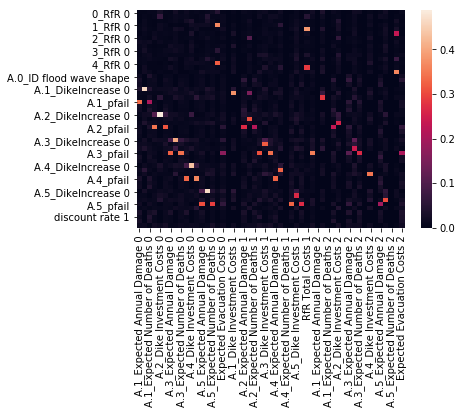

In [152]:
experiments, outcomes = utilities.load_results('Outcomes/200Scenarios50Policies.csv')
experiments = experiments.drop(columns = "model")


from ema_workbench.analysis import feature_scoring
scores = feature_scoring.get_feature_scores_all(experiments, outcomes)
sns.heatmap(scores)
plt.show()

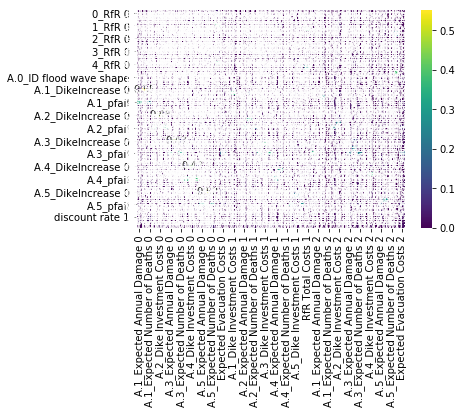

In [153]:
x = experiments
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap='viridis', annot=True)
plt.show()